In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns


In [ ]:
# Importing the dataset
dataset = pd.read_csv('IceCreamData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
dataset.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 / 3, random_state=0)



In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

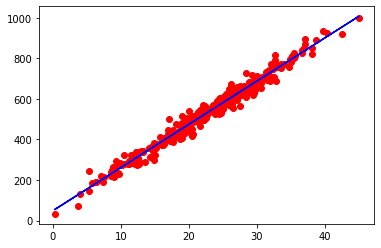

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')

<Figure size 432x288 with 0 Axes>

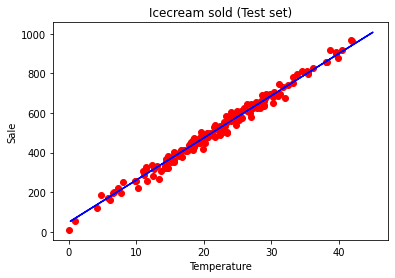

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Icecream sold (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Sale')
plt.figure()

In [ ]:

def mase(actual, pred):
    # Calculate the mean absolute error (MAE).
    mae = np.mean(np.abs(actual - pred))

    # Calculate the mean absolute error of the naive forecast.
    mae_naive = np.mean(np.abs(actual[1:] - actual[:-1]))

    # Calculate the MASE.
    mase = mae / mae_naive

    return mase


In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # or mse**(0.5)
r2 = metrics.r2_score(y_test, y_pred)
mase = mase(y_test, y_pred)
mape = mape(y_test, y_pred)

print("Results of sklearn.metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MASE:", mase)
print("MAPE:", mape)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 18.037145333754154
MSE: 498.9476723659189
RMSE: 22.337136619672606
MASE: 0.08804777484903921
MAPE: 6.422953626042132
R-Squared: 0.985424762719241


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


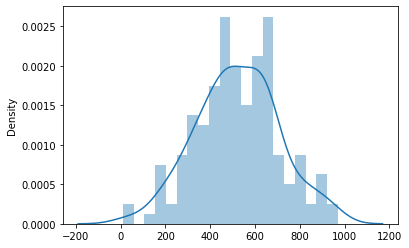

In [ ]:
sns.distplot((y_test), bins=20)

plt.show()
